## Time Series Data 
**Time Series Data**
* Time series data is a sequence of data points measured at regular time intervals, typically with a temporal relationship between them. This type of data is commonly used in fields such as finance, economics, weather forecasting, and signal processing.

* A modular time series it must be <mark><i>Stationary</i></mark>.
  + A stationary time series has the following properties:
    - Constant mean over time
    - Constant variance over time
    - Constant autocorrelation over time ( How each value in the time series related to it's neighbour should stays the same.)

* In this type we will train the model with the past data and test it with the future data. 
* Chronological Order 
* Sequential Order 
* Constant Frequency 
* Dynamic Nature 

# Time Series Components: Simplified Definitions

## 1. Secular Trend
- **Meaning**: The long-term underlying direction of the data (increasing, decreasing, or stable) over years/decades
- **Example**:  
  - Gradual rise in global temperatures due to climate change  
  - Steady growth of a company's revenue over 10 years

## 2. Seasonal Variable
- **Meaning**: Predictable, repeating patterns that occur at fixed intervals (daily, monthly, yearly)
- **Example**:  
  - Higher electricity usage every summer  
  - Christmas sales spikes every December

## 3. Cyclic Variable
- **Meaning**: Fluctuations without fixed periodicity, often tied to economic conditions (>1 year duration)
- **Example**:  
  - Housing market booms and busts  
  - Business investment cycles

## 4. Irregular Variation (Noise)
- **Meaning**: Random, unpredictable fluctuations caused by unexpected events or measurement errors
- **Example**:  
  - Stock price drops due to sudden political crisis  
  - Abnormal weather affecting retail sales

### Key Differences
| Component      | Duration       | Predictability | Example |
|---------------|---------------|----------------|---------|
| **Trend**     | Years/decades | High           | Population growth |
| **Seasonal**  | Fixed periods | Very high      | Holiday sales |
| **Cyclic**    | 1+ years      | Moderate       | Recessions |
| **Irregular** | Instantaneous | None           | Natural disasters |

## Methods of Measuring Trends

### <span style="color:cyan">1. Free Hand Curve Method</span> 

#### Definition
A non-mathematical approach to trend estimation where the analyst draws a smooth curve through the data points by visual inspection.

#### Key Characteristics
- **Nature**: Subjective (relies on analyst's judgment)
- **Formula**: None (shape depends on data pattern interpretation)
- **Speed**: Quick visualization method
- **Best For**: Initial exploratory analysis

#### When to Use
1. Preliminary trend identification
2. Irregular data patterns that don't fit mathematical models
3. Visual presentations to highlight overall patterns

#### Advantages
- Requires no complex calculations
- Immediate visual representation
- Useful for small datasets

#### Limitations
- **Reproducibility**: Different analysts may draw different curves
- **Forecasting**: Cannot generate quantitative forecasts
- **Rigor**: Lacks statistical validation
- **Consistency**: Results vary between applications

#### Example Application

In [4]:
import numpy as np
import plotly.graph_objects as go
from IPython.display import HTML, display

# Generate synthetic data
np.random.seed(42)
time = np.arange(0, 24, 0.5)
y_values = np.sin(time) + np.random.normal(0, 0.2, len(time))

# Create figure
fig = go.Figure()

# Add original data
fig.add_trace(go.Scatter(
    x=time, 
    y=y_values, 
    name='Data', 
    mode='markers+lines', 
    marker_color='white', 
    line_color='orange'
))

# Add freehand trend line (manually approximated)
freehand_x = [0, 24]  # Start and end points
freehand_y = [0, 0.5]  # Manually estimated start/end values

fig.add_trace(go.Scatter(
    x=freehand_x,
    y=freehand_y,
    name='Freehand Trend',
    mode='lines',
    line=dict(color='cyan', width=4, dash='solid')
))

# Update layout
fig.update_layout(
    title='Free Hand Curve Method',
    xaxis=dict(
        title='Time', 
        zeroline=True, 
        zerolinewidth=1.5, 
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title='Value', 
        zeroline=True, 
        zerolinewidth=1.5, 
        zerolinecolor='gray'
    ),
    showlegend=True,
    template='plotly_dark',
    width=1500,
    height=800  # Increased height for better scrolling
)

# Convert to scrollable HTML
html = f"""
<div style='width:100%; height:400px; overflow:auto; border:1px solid #ccc; margin:40px 0;'>
{fig.to_html(full_html=False, include_plotlyjs='cdn')}
</div>
"""
display(HTML(html))

[*********************100%***********************]  1 of 1 completed


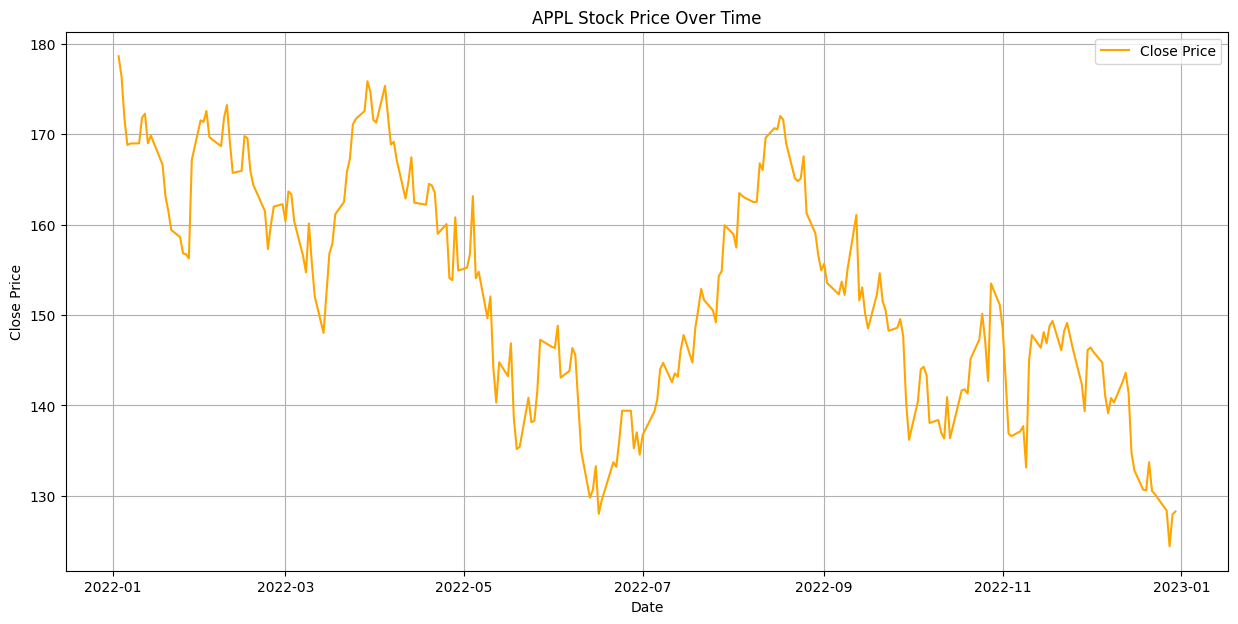

In [26]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download("AAPL", start="2022-01-01", end="2022-12-31")

plt.figure(figsize=(15, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = 'orange')
plt.title('APPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:cyan">2. Semi-Average Method</span>

#### Definition
The **semi-average method** is a simple statistical technique for trend estimation that divides time series data into two equal parts and calculates their respective averages to establish a linear trend line.

#### Key Characteristics
| Feature          | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **Calculation**  | Divides data into two equal halves and computes their means                |
| **Complexity**   | Simple arithmetic (no advanced math required)                              |
| **Output**       | Straight-line trend connecting the two semi-averages                       |
| **Best For**     | Rough trend approximation in small datasets                                |

#### When to Use
✔️ **Appropriate for**:
- Quick preliminary trend analysis
- Small datasets (<50 observations)
- When only a rough linear trend is needed
- Situations requiring minimal computation

❌ **Avoid when**:
- Data has strong seasonality/cyclical patterns
- Non-linear trends are present
- High precision is required

#### Step-by-Step Implementation
```python
import numpy as np

# Sample data (time periods vs values)
years = np.arange(2010, 2020)
values = [12, 15, 14, 18, 20, 22, 25, 24, 27, 30]


In [ ]:
import numpy as np 
import plotly.graph_objects as go

# Generate data
years = np.arange(2000, 2023)
values = np.random.randint(100, 1000, len(years))

# If the length of the data is odd then remove the middle row for calculating semi-average line
if len(years) % 2 != 0:
    middle_index = len(years) // 2
    trimmed_arr = np.delete(years, middle_index)
    
elif len(years) % 2 == 0:
    trimmed_arr = years

# Split data
first_semi_year, second_semi_year = np.array_split(trimmed_arr, 2)
first_half_values, second_half_values = np.array_split(values, 2)

# Calculate averages
avg_years = [np.mean(first_semi_year), np.mean(second_semi_year)]
avg_values = [np.mean(first_half_values), np.mean(second_half_values)]
    

# Create figure
fig = go.Figure()

# Add original data trace
fig.add_trace(go.Scatter(
    x=years, 
    y=values, 
    name='Data', 
    mode='markers+lines',
    marker=dict(color='white', size=8),
    line=dict(color='orange', width=2)
))

# Add semi-average line trace
fig.add_trace(go.Scatter(
    x=avg_years,
    y=avg_values,
    mode='lines+markers',
    name='Semi-Average Line',
    marker=dict(color='red', size=12),
    line=dict(color='cyan', width=4, dash='dash')
))

# Update layout
fig.update_layout(
    title='Semi-Average Method Demonstration',
    xaxis_title='Year',
    yaxis_title='Value',
    showlegend=True,
    template='plotly_dark',
    width=1500,
    height=800,
    hovermode='x unified'
)

fig.show()

### <span style="color:cyan">3. Moving Average Method: Explained</span>


#### Definition
A **moving average** smooths time series data by creating a series of averages from overlapping/adjacent subsets of the full dataset. It helps reveal trends by reducing noise.

#### Key Characteristics
| Feature          | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **Calculation**  | Average of sliding window of `n` periods                                   |
| **Complexity**   | Simple arithmetic                                                          |
| **Output**       | Smoothed curve lagging behind actual data                                  |
| **Best For**     | Noise reduction, short-term trend identification                          |

#### When to Use
✔️ **Appropriate for**:
- Reducing random fluctuations in data
- Identifying underlying trends
- Preparing data for further analysis
- Smoothing volatile metrics (e.g., stock prices)

❌ **Avoid when**:
- Analyzing seasonality (use centered averages instead)
- Immediate reaction to changes is critical
- Data has structural breaks

---

#### Types of Moving Averages
1. **Simple Moving Average (SMA)**  
   ```python
   SMA_t = (y_t + y_{t-1} + ... + y_{t-n+1}) / n



In [27]:
# For odd gap moving average

# Generate data
years = np.arange(2000, 2023)
gap = 3    # Set the gap value
values = np.random.randint(100, 1000, len(years))

cyc_fluc = []
for i in range(1, len(years)):
    cyc_fluc.append(values[i] - values[i-1])
    
try:
    div_res = len(years) % gap  # No need for int() since % returns int
    if gap <= 0 or gap > len(years) or gap % 2 == 0:
        raise ValueError("Invalid Gap!")
except ZeroDivisionError:
    print("Error: Gap cannot be zero")
except TypeError:
    print("Error: Gap must be a number")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

add_list = []
for i in range(len(cyc_fluc) - gap):
    res_sum = 0
    for j in range(gap):
        res_sum += cyc_fluc[i+j]
    add_list.append(res_sum / gap)
    
# Even gap moving average

     

## Additive vs. Multiplicative Time Series Models

### Additive Relationship
- **Formula**:  
  `Y(t) = Trend(t) + Seasonality(t) + Residuals(t)`  
- **When to Use**:  
  - When seasonal fluctuations are **constant** over time  
  - Trend magnitude is independent of seasonality  
- **Example**:  
  `Monthly temperature variations (same ±5°C swing every year)`  

### Multiplicative Relationship
- **Formula**:  
  `Y(t) = Trend(t) * Seasonality(t) * Residuals(t)`  
- **When to Use**:  
  - When seasonal fluctuations **grow/shrink with trend**  
  - Common in economic data (e.g., sales, stock prices)  
- **Example**:  
  `Retail sales (10% holiday spikes proportional to baseline sales growth)`  

#### Key Differences
| Feature          | Additive                     | Multiplicative               |
|------------------|-----------------------------|------------------------------|
| **Seasonality**  | Constant amplitude          | Proportional to trend        |
| **Residuals**    | Additive noise              | Multiplicative noise         |
| **Transformation**| None                       | Log-transform stabilizes variance |

#### Code Example (Decomposition)
```python
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive = seasonal_decompose(series, model='additive')

# Multiplicative Decomposition
multiplicative = seasonal_decompose(series, model='multiplicative')

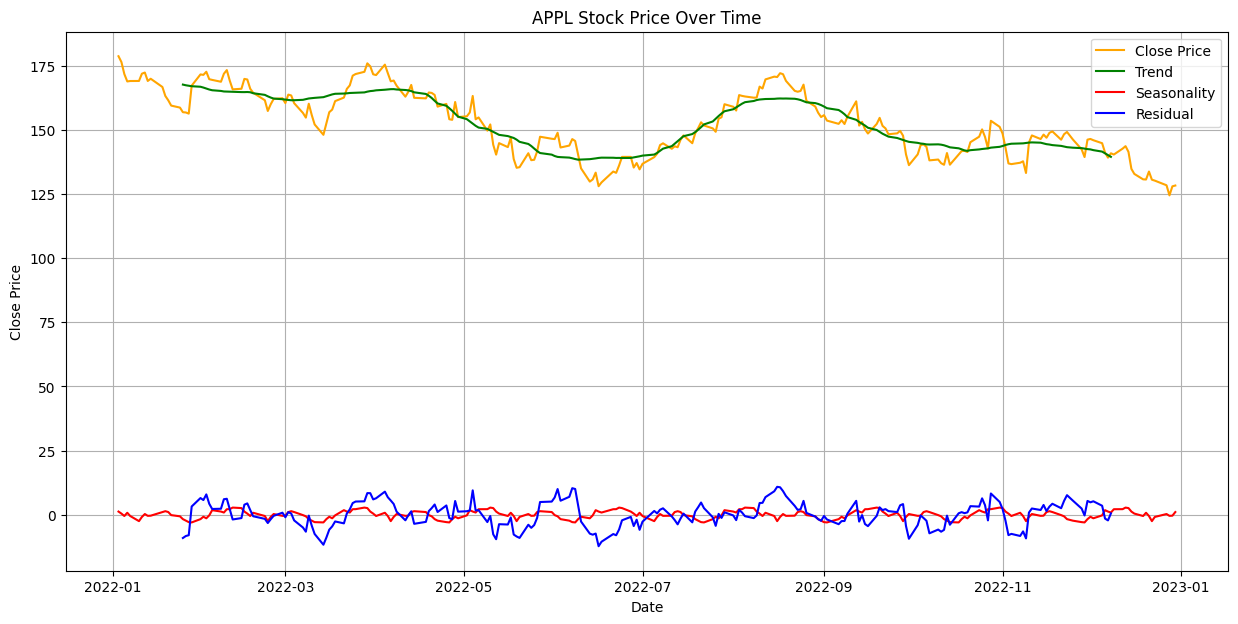

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition_addititve = seasonal_decompose(stock_data['Close'], model='additive', period=30)

trend_additive = decomposition_addititve.trend
seasonal_additive = decomposition_addititve.seasonal
residual_additive = decomposition_addititve.resid

plt.figure(figsize=(15, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = 'orange')
plt.plot(stock_data.index, trend_additive, label='Trend', color = 'green')
plt.plot(stock_data.index, seasonal_additive, label='Seasonality', color = 'red')
plt.plot(stock_data.index, residual_additive, label='Residual', color = 'blue')
plt.title('APPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

**Checking Stationarity**
=========================

#### 1. Visual Inspection 

* **Trends**: If the mean temperature rises/falls over time → **Non-stationary**.
* **Seasonality**: Repeated patterns (e.g., daily/yearly cycles) → **Non-stationary**.

#### Your Plot Shows:

* **Variability**: Fluctuations suggest changing mean/variance.
* **Possible Seasonality**: Peaks/valleys at regular intervals (e.g., weekly/monthly).

## Augmented Dickey-Fuller (ADF) Test

## **Purpose**
The ADF test is a statistical hypothesis test used to determine whether a given **time series is stationary** (i.e., has no unit root). It is a key tool in econometrics and time series forecasting.

---

### **Null and Alternative Hypotheses**
- **Null Hypothesis (H₀):**  
  The time series has a unit root (i.e., it is **non-stationary**).
- **Alternative Hypothesis (H₁):**  
  The time series does not have a unit root (i.e., it is **stationary**).

---

### **Test Statistic and Critical Values**
- The ADF test computes a **test statistic** (e.g., `-2.73`). 
- More negative means more likely to be stationary.  
- Compare this value to **critical values** (e.g., `1%: -3.43`, `5%: -2.86`, `10%: -2.57`).  
- **Decision Rule:**  
  - If the test statistic < critical value → **Reject H₀** (series is stationary).  
  - If the test statistic > critical value → **Fail to reject H₀** (series is non-stationary).

---

### **Interpretation of p-value**
- **p-value < 0.05:** Strong evidence against H₀ (stationary).  
- **p-value ≥ 0.05:** Weak evidence against H₀ (non-stationary).

---

### **Python Implementation (using `statsmodels`)**
```python
from statsmodels.tsa.stattools import adfuller

# Example usage:
result = adfuller(time_series_data, autolag='AIC')
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")